In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # for plotting graphs
import seaborn # statistical data visualization library

from sklearn import metrics
import math
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

## Examine the data first

In [2]:
df = pd.read_csv('./input/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv('./input/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


List all fields in the DataFrame:

In [4]:
print('total fields = %d' % (len(df.keys())))
print('fields = %s' % (df.keys()))

total fields = 81
fields = Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

Check correlation matrix

In [5]:
df.corr().head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


Check heatmap:

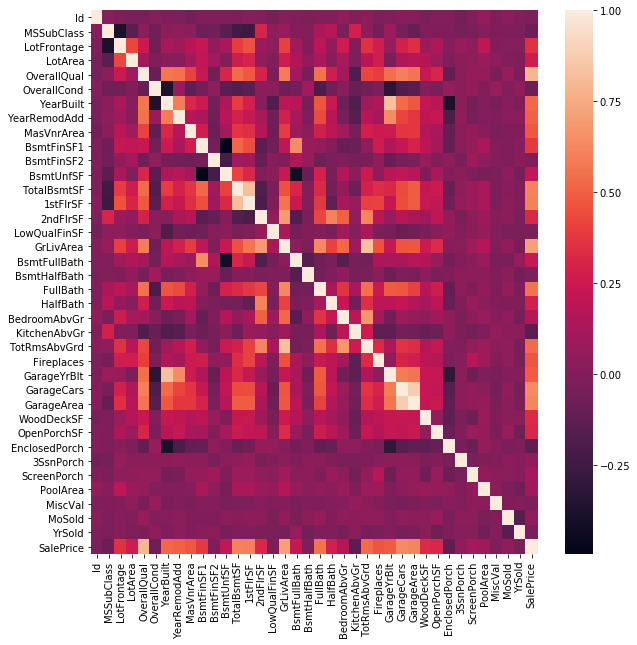

In [6]:
plt.figure(figsize = (10, 10))
seaborn.heatmap(df.corr())

Some features have stronger relationship with SalePrice:
- Numerical features:
  - OverallQual
  - BsmtFinSF1
  - BsmtUnfSF
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - GrLivArea
  - FullBath
  - GarageCars
  - GarageArea
  - MSSubClass: Looks like it can be negative feature
- Non-numerical features (after sorted by average SalePrice):
  - Neighborhood
  - RoofMatl: Especially for high price house
  - CentralAir: If value is N then it can not be high price
  - Electrical: Similar to CentralAir
  - KitchenQual

In [7]:
#Chosen ones after EDA

numerical_fields = [
    'OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt'
]


categorical_fields = [
    'Neighborhood','MSZoning','KitchenQual','CentralAir','MasVnrType'
]

## Neural Network
Use un-processed numerical features only to see how it can be.

In [8]:
def get_scaled_series(base = 1.0):
    def wrapper_get_scaled_series(s):
        s_max = max(s)
        return [base * float(n) / float(s_max) for n in s]
    return wrapper_get_scaled_series

def get_dummies(dummy_na = False):
    def wrapper_get_dummies(s):
        df = pd.get_dummies(s, prefix = s.name, dummy_na = dummy_na)
        df1 = pd.DataFrame()
        for k in df.keys():
            s = df[k]
            name = s.name
            name = name.replace('(', '')
            name = name.replace(')', '')
            name = name.replace(' ', '')
            s1 = s.rename(name)
            df1[s1.name] = s1
        return df1
    return wrapper_get_dummies

def convert_features(df, num_fields, cat_fields, num_fields_proc = None, cat_fields_proc = None, label_name = None, train_validate_ratio = None):
    if num_fields_proc is None:
        num_fields_proc = lambda x: x
    if cat_fields_proc is None:
        cat_fields_proc = lambda x: x
    features = pd.DataFrame()
    for k in num_fields:
        features[k] = num_fields_proc(df[k].copy())
    for k in cat_fields:
        features = features.join(cat_fields_proc(df[k].copy()))
    if label_name is not None:
        labels = df[label_name].copy()
    else:
        labels = None
    if train_validate_ratio is None:
        train_validate_ratio = 1
    train_num = int(len(df) * train_validate_ratio)
    validate_num = len(df) - train_num
    train_features = features.head(train_num)
    validate_features = features.tail(validate_num)
    if labels is not None:
        train_labels = labels.head(train_num)
        validate_labels = labels.tail(validate_num)
    else:
        train_labels = None
        validate_labels = None
    return (train_features, train_labels, validate_features, validate_labels)

In [9]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """
    return set([tf.feature_column.numeric_column(my_feature)
                for my_feature in input_features])

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    # features = {key:np.array(value) for key,value in dict(features).items()}                                            

    #
    # note: can convert to dict directly
    #
    features = dict(features)


    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def my_input_fn_pred(features, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    # features = {key:np.array(value) for key,value in dict(features).items()}                                            

    #
    # note: can convert to dict directly
    #
    features = dict(features)


    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices(features) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features = ds.make_one_shot_iterator().get_next()
    return features

def train_dnn_regressor_model(
    optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a DNN regression model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearRegressor` object trained on the training data.
    """
    # RMSE, RMSLE: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

    if validation_examples is not None and validation_targets is not None:
        do_validation = True
    else:
        do_validation = False
    
    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units,
        optimizer=optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                            training_targets, 
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                    training_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)
    if do_validation == True:
        predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                          validation_targets, 
                                                          num_epochs=1, 
                                                          shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE, RMSLE (on training data):")
    training_rmse = []
    validation_rmse = []
    training_rmsle = []
    validation_rmsle = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )

        # Take a break and compute predictions.
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        # Compute training loss RMSE.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_targets, training_predictions))

        # Compute training loss RMSLE.
        training_root_mean_squared_log_error = math.sqrt(
            metrics.mean_squared_log_error(training_targets, training_predictions))
        
        if do_validation == True:
            validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
            validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

            # Compute validation loss RMSE.
            validation_root_mean_squared_error = math.sqrt(
                metrics.mean_squared_error(validation_targets, validation_predictions))

            # Compute validation loss RMSLE.
            validation_root_mean_squared_log_error = math.sqrt(
                metrics.mean_squared_log_error(validation_targets, validation_predictions))

        # Occasionally print the current loss.
        print("  period %02d : %0.2f, %0.4f" % (period, training_root_mean_squared_error, training_root_mean_squared_log_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        training_rmsle.append(training_root_mean_squared_log_error)
        if do_validation == True:
            validation_rmse.append(validation_root_mean_squared_error)
            validation_rmsle.append(validation_root_mean_squared_log_error)
 
    print("Model training finished.")
    # Output a graph of loss metrics over periods.
    plt.figure(figsize = (15, 5))
    # RMSE
    plt.subplot(1, 3, 1)
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.plot(training_rmse, label="training")
    if do_validation == True:
        plt.plot(validation_rmse, label="validation")
    plt.legend()
    # RMSLE
    plt.subplot(1, 3, 2)
    plt.ylabel("RMSLE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Logarithmic Error vs. Periods")
    plt.plot(training_rmsle, label="training")
    if do_validation == True:
        plt.plot(validation_rmsle, label="validation")
    plt.legend()
    # Target / Prediction
    plt.subplot(1, 3, 3)
    plt.ylabel("Target")
    plt.xlabel("Prediction")
    plt.title("Target vs. Prediction")
    lim = max(training_targets)
    if do_validation == True:
        lim = max(lim, max(validation_targets))
    lim *= 1.05
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.plot([0, lim], [0, lim], alpha = 0.5, color = 'red')
    plt.scatter(training_predictions, training_targets, alpha = 0.5, label="training")
    if do_validation == True:
        plt.scatter(validation_predictions, validation_targets, alpha = 0.5, label="validation")
    plt.legend()
    plt.tight_layout()
    
    return dnn_regressor


In [10]:
numerical_fields = [
    'OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt'
]


categorical_fields = [
    'Neighborhood','MSZoning','KitchenQual','CentralAir','MasVnrType'
]


ret = convert_features(df, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_scaled_series(base=1000), 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = 'SalePrice',
                       train_validate_ratio = 0.7)


training_features = ret[0]
training_targets = ret[1]
validation_features = ret[2]
validation_targets = ret[3]

Training model...
RMSE, RMSLE (on training data):
  period 00 : 50798.53, 0.2764
  period 01 : 38569.56, 0.2437
  period 02 : 37717.72, 0.2202
  period 03 : 36810.23, 0.2070
  period 04 : 36409.49, 0.2004
  period 05 : 36807.72, 0.1957
  period 06 : 36816.99, 0.1893
  period 07 : 36430.13, 0.1893
  period 08 : 38894.18, 0.2025
  period 09 : 36276.65, 0.1881
Model training finished.


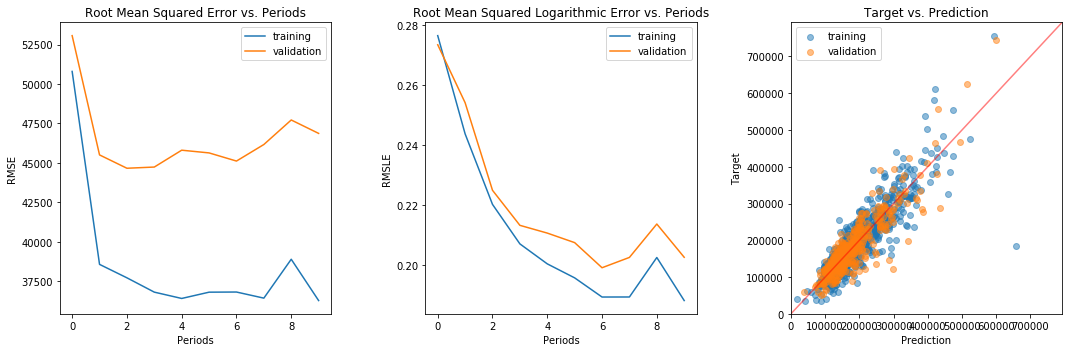

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=2000,
    batch_size=100,
    hidden_units=[22,44,22,11],
    training_examples=training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

From the result, it is underestimation

Scale all features to 0-1000

In [12]:
numerical_fields = [
    'OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt'
]


categorical_fields = [
    'Neighborhood','MSZoning','KitchenQual','CentralAir','MasVnrType'
]


ret = convert_features(df_test, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_scaled_series(base=1000), 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = None,
                       train_validate_ratio = 1.0)

test_features = ret[0]

# missing values
for k in test_features.keys():
    s = test_features[k]
    na_cnt = sum(s.isna())
    if na_cnt > 0:
        test_features[k] = s.fillna(0.0)

predict_test_input_fn = lambda: my_input_fn_pred(test_features,
                                                 num_epochs=1, 
                                                 shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_test_input_fn)
df_submit = pd.DataFrame()
df_submit['Id'] = df_test['Id']
df_submit['SalePrice'] = np.array([item['predictions'][0] for item in test_predictions])

df_submit.to_csv('./test_prediction_new.csv', index = False)

In [13]:
#first time, I didn't have categorical_fields, just numerical_fields and without feature engineering, the score was 4.1
#second time, I tried doing the same process but with categorical_fields implemented, and it gave me 1.21390
#third time, I tried doing the same process as before, but now, with feature engineering, I scaled down the numerical fields to be the value between 0 and 1000, and it gave me 0.19599

### yes means passed my EDA histogram test, and no means it didn't pass the histogram test. Histogram test of mine checks if normal distribution is hard to be made or there is not enough data points to bucketize.
* OverallQual-yes
* GrLivArea-yes
* GarageCars-no
* GarageArea-no
* TotalBsmtSF-no
* 1stFlrSF-yes
* FullBath-no
* TotRmsAbvGrd-yes
* YearBuilt-yes

* Using only five numerical fields helped me more than using 9, which included correlations of less than 0.60. The score was 0.18557.